# Spatial subsetting

In [44]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.ndimage 
import scipy.stats 
import shapely 
import geopandas as gpd 
import rasterio 
import rasterio.plot 
import rasterio.merge 
import rasterio.features

In [45]:
from helpers import nz

nz.shape

(16, 7)

>Subset the data to get Canterbury

In [46]:
from helpers import nz_height
nz_height.shape

(101, 3)

>Select the points in heights which intersect Canterbury

In [47]:
canterbury = nz[nz.Name == 'Canterbury']
print(canterbury)

          Name Island     Land_area  Population  Median_income  Sex_ratio  \
10  Canterbury  South  44504.499091    612000.0          30100   0.975327   

                                             geometry  
10  MULTIPOLYGON (((1686901.914 5353232.66, 167999...  


In [48]:
sel = nz_height.intersects(canterbury.geometry.iloc[0])

In [49]:
canterbury_height = nz_height[sel]
canterbury_height.shape

(70, 3)

In [50]:
print(canterbury_height.iloc[:3])

   t50_fid  elevation                         geometry
4  2362630       2749    POINT (1378169.6 5158491.453)
5  2362814       2822  POINT (1389460.041 5168749.086)
6  2362817       2778  POINT (1390166.225 5169466.158)


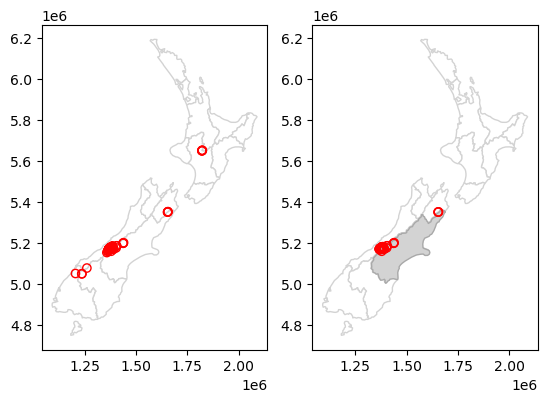

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2)
nz.plot(ax=ax1, color='white', edgecolor='lightgrey')
nz_height.plot(ax=ax1, color='None', edgecolor='r')
nz.plot(ax=ax2, color='white', edgecolor='lightgrey')
canterbury.plot(ax=ax2, color='lightgrey', edgecolor='darkgrey')
canterbury_height.plot(ax=ax2, color='None', edgecolor='r');

>Subset multiple groups

In [52]:
canterbury_southland = nz[nz.Name.isin(['Canterbury', 'Southland'])]
sel = nz_height.intersects(canterbury_southland.union_all())

In [53]:
canterbury_southland_heights = nz_height[sel]
print(canterbury_southland_heights)

    t50_fid  elevation                         geometry
0   2353944       2723  POINT (1204142.603 5049971.287)
4   2362630       2749    POINT (1378169.6 5158491.453)
5   2362814       2822  POINT (1389460.041 5168749.086)
6   2362817       2778  POINT (1390166.225 5169466.158)
7   2363991       3004  POINT (1372357.036 5172728.743)
..      ...        ...                              ...
90  2365400       2723  POINT (1436552.349 5197470.702)
91  2365454       2706  POINT (1438695.851 5200244.307)
92  2380298       2877  POINT (1652788.127 5348984.469)
93  2380300       2711  POINT (1654213.379 5349962.973)
94  2380308       2885  POINT (1654898.622 5350462.779)

[71 rows x 3 columns]


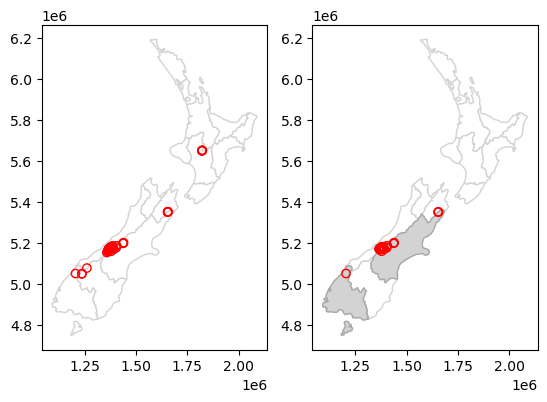

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2)
nz.plot(ax=ax1, color='white', edgecolor='lightgrey')
nz_height.plot(ax=ax1, color='None', edgecolor='r')
nz.plot(ax=ax2, color='white', edgecolor='lightgrey')
canterbury_southland.plot(ax=ax2, color='lightgrey', edgecolor='darkgrey')
canterbury_southland_heights.plot(ax=ax2, color='None', edgecolor='r');

In [56]:
canterbury.to_file('../data/canterbury.gpkg', 
                  driver='GPKG')

In [57]:
test = gpd.read_file('../data/canterbury.gpkg')

In [58]:
test

,Name,Island,Land_area,Population,Median_income,Sex_ratio,geometry
0,Canterbury,South,44504.499091,612000.0,30100,0.975327,"MULTIPOLYGON (((1686901.914 5353232.66, 167999..."
